# qthist2d Examples

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from qthist2d import qthist, qtcount

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [5]:
file='test/main_sequence.txt' # from Tyler's K2 work

df = pd.read_table(file, sep='\s+', names=('p', 'p_e', 'bp_rp', 'g_rp'))


Text(0.5, 0, '$G_{BP} - G_{RP}$')

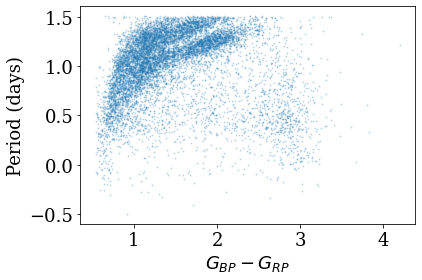

In [53]:
x,y = df['bp_rp'], np.log10(df['p']+1e-5)

plt.scatter(x, y, s=1, alpha=0.2)
plt.ylabel('Period (days)')
plt.xlabel('$G_{BP} - G_{RP}$')

In [71]:
num, xmin, xmax, ymin, ymax = qthist(x,y, N=7, thresh=25, density=True)

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)

# plt.scatter(x, y, s=4, alpha=0.2)

# for k in range(len(num)):
#     ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
#                                fc ='none', ec='k', alpha=0.5))
# plt.ylabel('Period (days)')
# plt.xlabel('$G_{BP} - G_{RP}$')

Text(0.5, 0, '$G_{BP} - G_{RP}$')

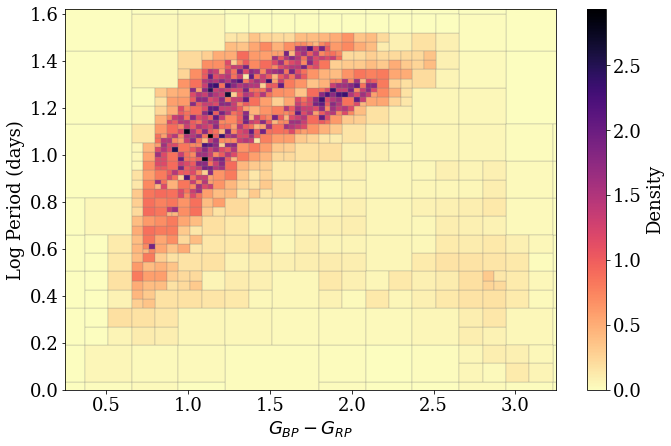

In [72]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)

# CMAP = plt.cm.Spectral_r
CMAP = plt.cm.magma_r

clr = (num - np.nanmin(num)) / (np.nanmax(num) - np.nanmin(num))

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc=CMAP(clr[k]), ec='grey', alpha=1, lw=0.25))

# create a fake image, just to invoke colormap
img = plt.imshow(np.array([[0,1]]), cmap=CMAP, aspect='auto',origin='lower', 
                 vmin=num.min(),vmax=num.max()) # scale to the density
img.set_visible(False) # throw this away
cb = plt.colorbar()
cb.set_label('Density')

# plt.scatter(x,y,  c='w', alpha=0.5, zorder=2, s=10)
plt.xlim(.25,3.25)
plt.ylim(0,1.62)
plt.ylabel('Log Period (days)')
plt.xlabel('$G_{BP} - G_{RP}$')